# XGBoost Classifier - End-to-End Project

🎯 Problem Statement:
**Predict whether a user will click on an online advertisement based on behavior and demographic features.**

📋 Simulated Dataset Columns:
age, daily_time_spent, area_income, daily_internet_usage, ad_topic_length

gender (categorical)

clicked_on_ad (target: 0 = No, 1 = Yes)

XGBoost (Extreme Gradient Boosting) is one of the most popular and powerful gradient boosting frameworks used in real-world machine learning competitions and production systems.

Let’s do an end-to-end ML project using XGBoost with a fresh problem statement, covering:

✅ Data Cleaning
✅ Preprocessing
✅ Class Imbalance Handling
✅ Train-Test Split
✅ Model Training
✅ Evaluation
✅ Hyperparameter Tuning
✅ Pros & Cons



In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import xgboost as xgb


In [3]:
# Create Simulated Dataset

np.random.seed(42)

data = {
    'age': np.random.randint(18, 70, 100),
    'daily_time_spent': np.random.uniform(30, 180, 100),
    'area_income': np.random.randint(20000, 120000, 100),
    'daily_internet_usage': np.random.uniform(100, 300, 100),
    'ad_topic_length': np.random.randint(10, 50, 100),
    'gender': np.random.choice(['male', 'female'], 100),
    'clicked_on_ad': np.random.choice([0, 1], 100, p=[0.65, 0.35])  # imbalanced
}

df = pd.DataFrame(data)
df.head(10)

,age,daily_time_spent,area_income,daily_internet_usage,ad_topic_length,gender,clicked_on_ad
0,56,54.790041,71663,229.020672,31,male,0
1,69,32.345461,35708,233.784812,38,male,1
2,46,93.510222,111906,272.833513,23,male,1
3,32,89.232228,69811,146.037054,37,female,1
4,60,74.023226,22811,199.838676,14,male,1
5,25,32.111973,76250,214.400840,39,male,1
6,38,59.826361,92082,253.710803,14,female,0
7,56,136.701293,54754,108.720754,21,female,0
8,36,148.526331,115742,298.910102,25,male,0
9,40,120.893996,31411,193.988903,35,female,0


In [4]:
# Data Cleaning

print(df.isnull().sum())  # No missing values in simulation
print(df.dtypes)



age                     0
daily_time_spent        0
area_income             0
daily_internet_usage    0
ad_topic_length         0
gender                  0
clicked_on_ad           0
dtype: int64
age                       int64
daily_time_spent        float64
area_income               int64
daily_internet_usage    float64
ad_topic_length           int64
gender                   object
clicked_on_ad             int64
dtype: object


In [5]:
# Preprocessing

# Encode gender
df['gender'] = LabelEncoder().fit_transform(df['gender'])

# Separate features and target
X = df.drop('clicked_on_ad', axis=1)
y = df['clicked_on_ad']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
# Train XGBoost Classifier

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)


In [8]:
# Evaluation

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.6
Confusion Matrix:
 [[11  3]
 [ 5  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.79      0.73        14
           1       0.25      0.17      0.20         6

    accuracy                           0.60        20
   macro avg       0.47      0.48      0.47        20
weighted avg       0.56      0.60      0.57        20



In [9]:
# Hyperparameter Tuning

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                    param_grid, cv=3, scoring='accuracy')

grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred_tuned = best_model.predict(X_test)



Best Parameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50, 'subsample': 0.8}


In [10]:
# Final Evaluation

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))


Tuned Accuracy: 0.7
Confusion Matrix:
 [[14  0]
 [ 6  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       0.00      0.00      0.00         6

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20



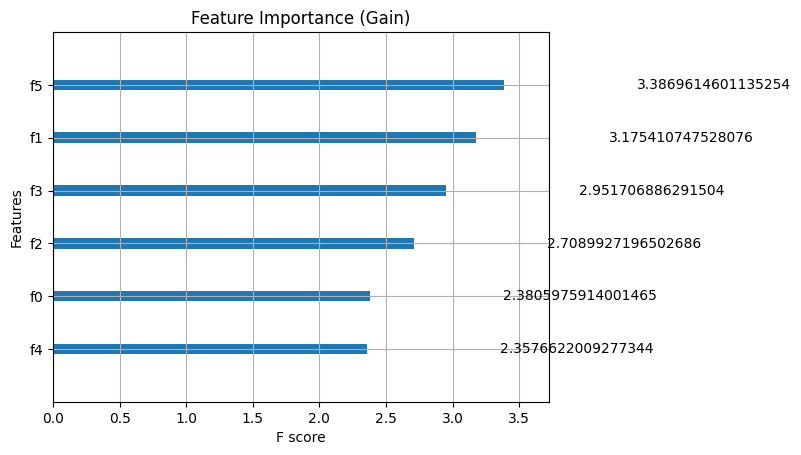

In [11]:
# Optional: Feature Importance Plot

xgb.plot_importance(best_model, importance_type='gain')
plt.title("Feature Importance (Gain)")
plt.show()


| Benefit                    | Why It Matters                 |
| -------------------------- | ------------------------------ |
| ⚡ Fast & Efficient         | Uses parallel computation      |
| 🎯 High Accuracy           | Often wins Kaggle competitions |
| 🔁 Handles missing values  | Automatically                  |
| 🧠 Handles class imbalance | Via `scale_pos_weight`         |
| 🔍 Feature importance      | Easy to interpret & visualize  |


| Limitation                   | Impact                     |
| ---------------------------- | -------------------------- |
| 🐢 Slower to tune            | Many hyperparameters       |
| 💾 High memory               | If dataset is large        |
| 📦 Slightly harder to deploy | Compared to simpler models |


**Real-World Use Cases**
🛒 Click-through rate prediction

🏦 Credit scoring & fraud detection

🧬 Bioinformatics

📈 Stock movement prediction


| Step       | Result                             |
| ---------- | ---------------------------------- |
| Algorithm  | XGBoost Classifier                 |
| Dataset    | Simulated Ad Click prediction      |
| Target     | `clicked_on_ad`                    |
| Evaluation | Accuracy, Confusion Matrix, Report |
| Tuning     | `n_estimators`, `depth`, `lr`      |
